In [51]:
import pandas as pd
import numpy as np
%matplotlib inline

In [52]:
df = pd.read_csv('Data/RestaurantVisitors.csv', index_col='date', parse_dates=True)

In [53]:
df.index.freq = 'D'
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [54]:
df1 = df.dropna()

In [55]:
for column in ['rest1',	'rest2', 'rest3', 'rest4', 'total']:
    df1[column] = df1[column].astype(int)

/var/folders/k9/3kpzjsgj0j128198fg7_ypfm0000gn/T/ipykernel_32892/3989797779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].astype(int)


<AxesSubplot: xlabel='date'>

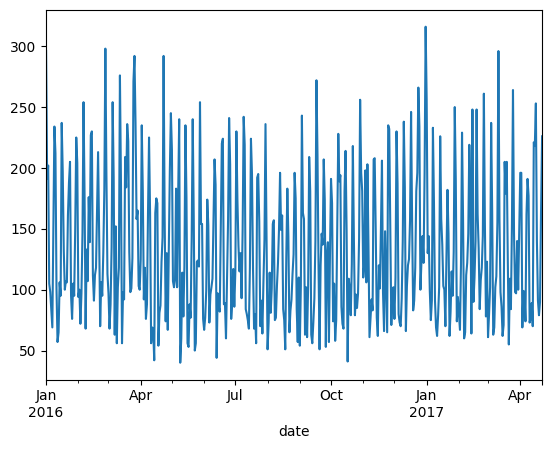

In [56]:
df1['total'].plot()

### 휴일 확인

In [57]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

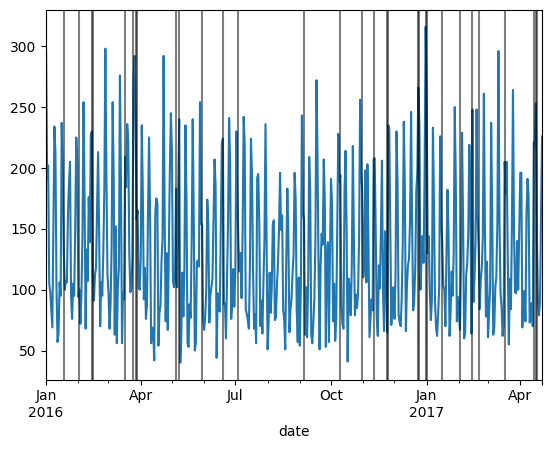

In [58]:
ax = df1['total'].plot()
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

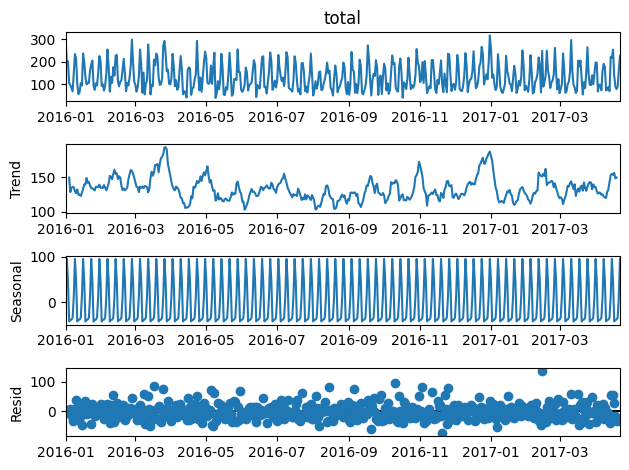

In [60]:
result = seasonal_decompose(df1['total'])
result.plot();

<AxesSubplot: xlabel='date'>

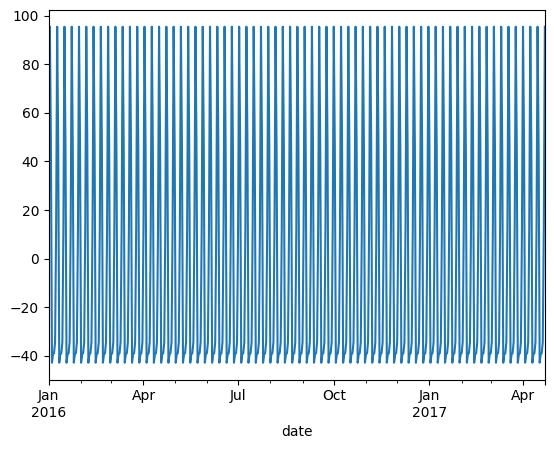

In [61]:
result.seasonal.plot()

In [62]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [63]:
from pmdarima import auto_arima

In [64]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.349
Date:                   Sun, 11 Dec 2022   AIC                           4774.698
Time:                           17:27:57   BIC                           4791.377
Sample:                       01-01-2016   HQIC                          4781.256
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5158      1.646      2.743      0.006       1.289       7.742
ar.S.L7        0.9639      0.013     75.373      0.000       0.939       0.989
ma.S.L7       -0.7618      0.049    -15.467      0.000      -0.858      -0.665
sigma2      1235.6763     74.286     16.634      0.000    1090.078    1381.275
===================================================================================
Ljung-Box (L1) (Q):                  16.09   Jarque-Bera (JB):                66.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.76
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

- ValueError: non-invertible starting MA parameters_found 가 나오면
- enforce_invertibility=False 로

In [66]:
model = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38191D+00    |proj g|=  2.35501D-02

At iterate    5    f=  5.28849D+00    |proj g|=  3.92507D-02

At iterate   10    f=  5.25768D+00    |proj g|=  3.44957D-02

At iterate   15    f=  5.17518D+00    |proj g|=  1.00374D-01

At iterate   20    f=  5.10256D+00    |proj g|=  8.57268D-04

At iterate   25    f=  5.10253D+00    |proj g|=  4.06803D-05

           * * *



 This problem is unconstrained.


Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   3.005D-07   5.103D+00
  F =   5.1025259842381621     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 11 Dec 2022   AIC                           4457.403
Time:                                   17:27:57   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
start = len(train)
end = len(train) + len(test) - 1

In [68]:
pred = results.predict(start, end, typ='levels').rename('SARIMA pred')

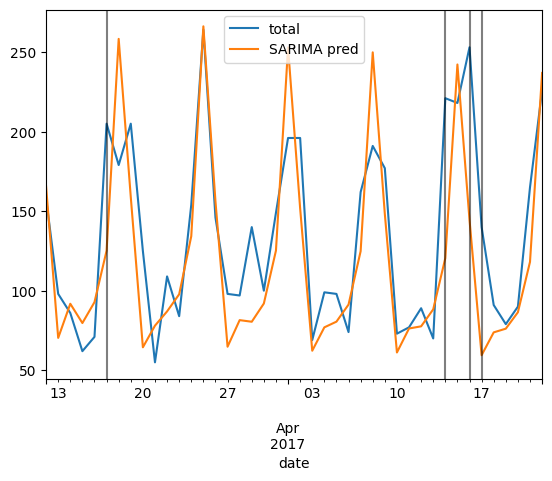

In [69]:
ax = test['total'].plot(legend=True)
pred.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)

In [70]:
from statsmodels.tools.eval_measures import rmse

In [71]:
error = rmse(test['total'], pred)
error

41.263154900765514

In [72]:
test['total'].mean()

134.26190476190476

## 외생변수 활용

In [73]:
# exogenous는 Series 형태가 아닌 DataFrame 형태를 취함
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.349
Date:                   Sun, 11 Dec 2022   AIC                           4774.698
Time:                           17:28:16   BIC                           4791.377
Sample:                       01-01-2016   HQIC                          4781.256
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5158      1.646      2.743      0.006       1.289       7.742
ar.S.L7        0.9639      0.013     75.373      0.000       0.939       0.989
ma.S.L7       -0.7618      0.049    -15.467      0.000      -0.858      -0.665
sigma2      1235.6763     74.286     16.634      0.000    1090.078    1381.275
===================================================================================
Ljung-Box (L1) (Q):                  16.09   Jarque-Bera (JB):                66.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.76
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52134D+00    |proj g|=  1.57319D-01

At iterate    5    f=  5.42733D+00    |proj g|=  1.25988D-02

At iterate   10    f=  5.17265D+00    |proj g|=  3.51471D-02

At iterate   15    f=  5.09795D+00    |proj g|=  3.32141D-02

At iterate   20    f=  4.81450D+00    |proj g|=  1.50807D-02

At iterate   25    f=  4.80601D+00    |proj g|=  1.01846D-03

At iterate   30    f=  4.80417D+00    |proj g|=  9.78659D-04

At iterate   35    f=  4.80235D+00    |proj g|=  1.29433D-03

At iterate   40    f=  4.80213D+00    |proj g|=  1.73141D-05

At iterate   45    f=  4.80213D+00    |proj g|=  7.09307D-05

At iterate   50    f=  4.79790D+00    |proj g|=  1.59665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2091.886
Date:                           Sun, 11 Dec 2022   AIC                           4195.773
Time:                                   17:28:17   BIC                           4220.239
Sample:                               01-01-2016   HQIC                          4205.428
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       65.6193      3.859     17.004      0.000      58.056      73.183
ar.L1          0.9969      0.004    223.430      0.000       0.988       1.006
ma.L1         -0.9281      0.020    -46.305      0.000      -0.967      -0.889
ar.S.L7        0.9998      0.000   3110.139      0.000       0.999       1.000
ma.S.L7       -0.9655      0.028    -34.861      0.000      -1.020      -0.911
sigma2       810.7014     48.016     16.884      0.000     716.591     904.812
===================================================================================
Ljung-Box (L1) (Q):                   8.00   Jarque-Bera (JB):                15.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.21
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
start = len(train)
end = len(train) + len(test) - 1

In [76]:
pred = results.predict(start, end, exog=test[['holiday']], typ='levels').rename('SARIMAX pred')

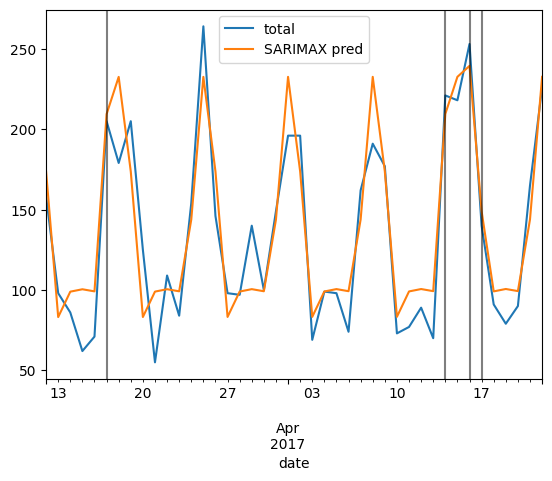

In [77]:
ax = test['total'].plot(legend=True)
pred.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)

In [78]:
error = rmse(test['total'], pred)
error

23.135292696939143

### 예측

In [79]:
model = SARIMAX(
    df1['total'], 
    exog=df1[['holiday']], 
    order=(1, 0, 1), 
    seasonal_order=(1, 0, 1, 7),  
    enforce_invertibility=False)
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51504D+00    |proj g|=  1.65208D-01

At iterate    5    f=  5.44060D+00    |proj g|=  9.00690D-02

At iterate   10    f=  5.42120D+00    |proj g|=  1.55808D-01

At iterate   15    f=  5.17412D+00    |proj g|=  8.13579D-02

At iterate   20    f=  5.17357D+00    |proj g|=  7.99840D-03

At iterate   25    f=  5.17119D+00    |proj g|=  1.36573D-01

At iterate   30    f=  5.03017D+00    |proj g|=  1.74220D-01

At iterate   35    f=  4.79577D+00    |proj g|=  1.27210D-01

At iterate   40    f=  4.78420D+00    |proj g|=  3.36893D-01

At iterate   45    f=  4.78269D+00    |proj g|=  1.54988D-02

At iterate   50    f=  4.78269D+00    |proj g|=  9.62299D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2286.124
Date:                           Sun, 11 Dec 2022   AIC                           4584.248
Time:                                   17:28:19   BIC                           4609.266
Sample:                               01-01-2016   HQIC                          4594.084
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0873      4.052     17.297      0.000      62.145      78.029
ar.L1          0.9998      0.001   1527.829      0.000       0.999       1.001
ma.L1         -0.9989      0.003   -295.874      0.000      -1.006      -0.992
ar.S.L7        0.9999      0.000   4110.058      0.000       0.999       1.000
ma.S.L7       -1.0338      0.028    -36.469      0.000      -1.089      -0.978
sigma2       730.4493     52.949     13.795      0.000     626.671     834.228
===================================================================================
Ljung-Box (L1) (Q):                  12.54   Jarque-Bera (JB):                24.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.27
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
df[478:]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


- 478행부터 예측하고자 하는 행, 전부 NA로 되어있음
- (외생변수는 미래의 값을 알고있어야 함)

In [84]:
exog_forecast = df[478:][['holiday']]

In [86]:
fcast = results.predict(
    len(df1), 
    len(df1)+38,
    exog=exog_forecast
).rename('SARIMAX forecast')

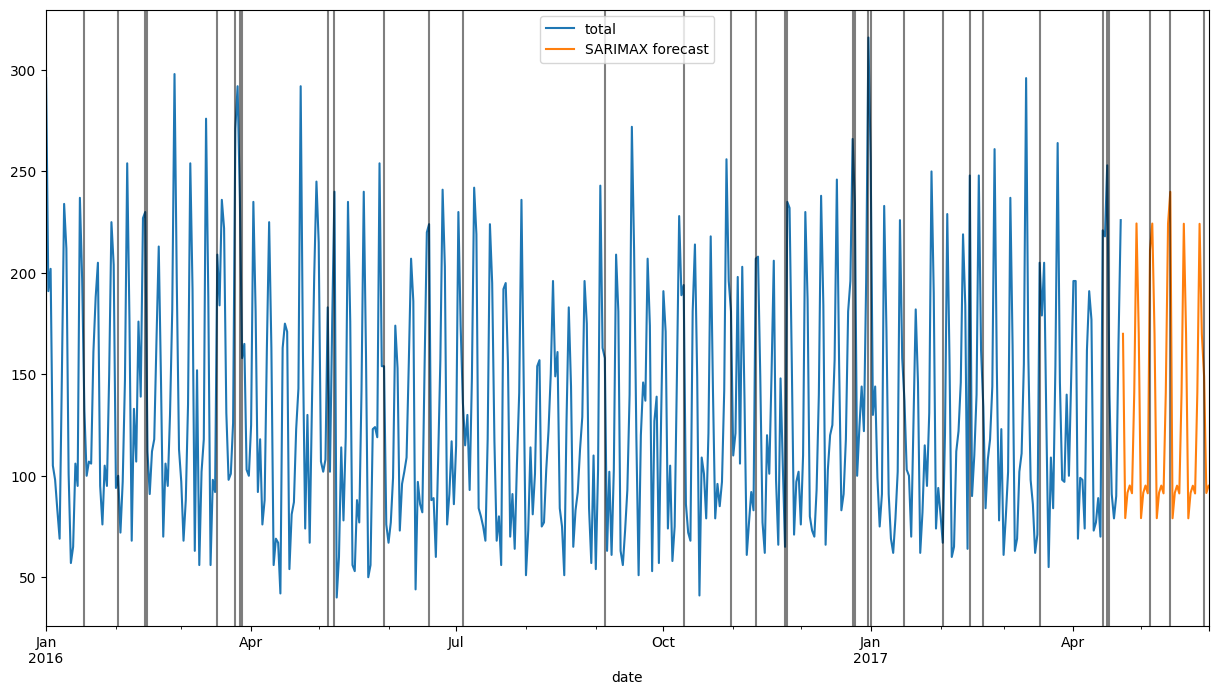

In [89]:
ax = df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)

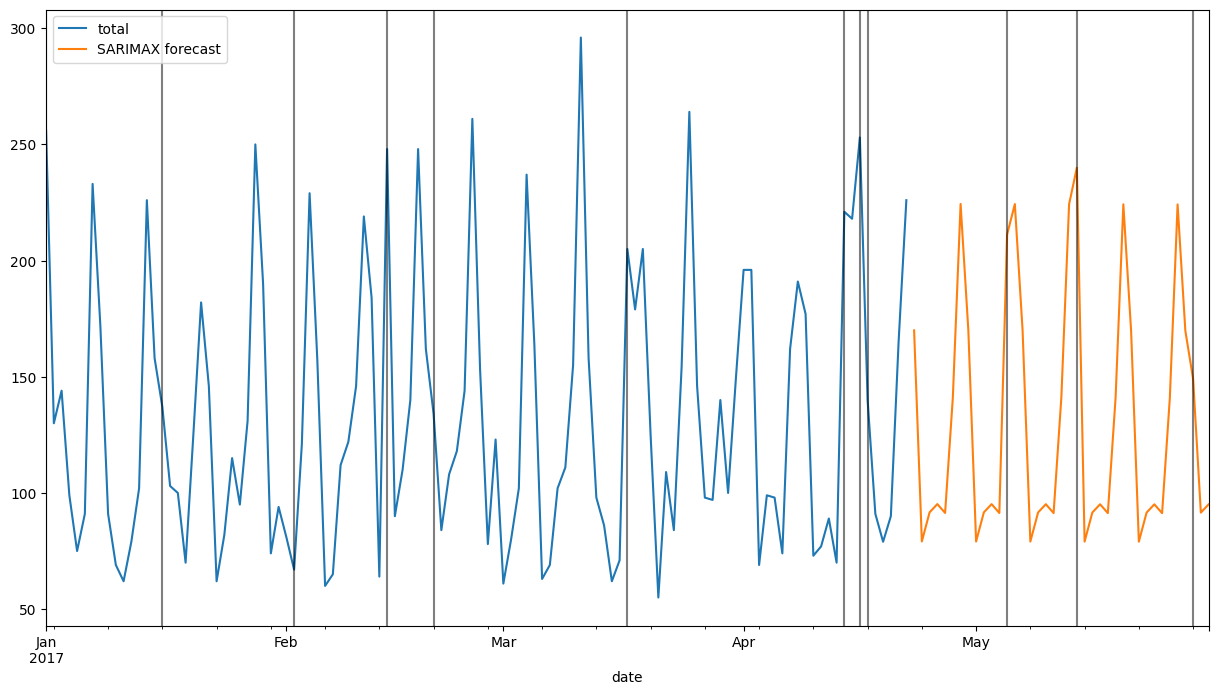

In [90]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)